# The House Prices datasets are from the Kaggle website. 
## Base on the describtion of house, we try to predict the house price. We use the Root-Mean-Square-Error metric to measure the predicted price. 

In [1]:
# import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns


%matplotlib inline

/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/yong/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


# Read data from train.csv and test.csv files

In [2]:
# Read data from train.csv. Since I only use train.csv for the notebook, then I only read data from train.csv. 
train_df = pd.read_csv('train.csv')

In [3]:
# show the head of train_df
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Print out the shape of dataset
print('the shape of the train_df: ' + str(train_df.shape))

the shape of the train_df: (1460, 81)


# Explore the datasets and clean the datasets

# Find and clean the missing data

In [5]:
# exploring the missing data
train_df.isnull().sum() / len(train_df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
                   ...   
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Fireplaces       0.000000
FireplaceQu      0.472603
GarageType  

In [6]:
# get all columns with missing data
null_columns=train_df.columns[train_df.isnull().any()]
train_df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# print out one of the missing datas

print(train_df[train_df["MasVnrType"].isnull()][null_columns])

      LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
234           NaN   NaN        NaN         NaN       Gd       TA           No   
529           NaN   NaN        NaN         NaN       TA       TA           No   
650          65.0   NaN        NaN         NaN       Gd       TA           No   
936          67.0   NaN        NaN         NaN       Gd       TA           No   
973          95.0   NaN        NaN         NaN       Gd       TA           No   
977          35.0  Pave        NaN         NaN       Gd       TA           No   
1243        107.0   NaN        NaN         NaN       Ex       Gd           Gd   
1278         75.0   NaN        NaN         NaN       Gd       TA           No   

     BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
234           GLQ          Unf      SBrkr          TA    BuiltIn       2002.0   
529           Rec          Unf      SBrkr          TA     Attchd       1975.0   
650           Unf          

In [8]:
# exploring the type of columns of missing datas
train_df[null_columns].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [9]:
# Divide the null_columns into 2 groups as null_columns_flo & null_columns_cat
null_columns_flo = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
null_columns_cat = [col for col in null_columns if col not in null_columns_flo ]

In [10]:
# set the missing value of null_columns_flo to equal 0

for col in null_columns_flo:
    train_df[col].fillna(0, inplace=True)


## Fill the missing data

In [11]:
# set the missing value of nul_columns_cat to 'Not_Available'

train_df.fillna('Not_Available', inplace = True)

In [12]:
# to check whether there is still any missing data

train_df.isnull().sum().sum()

0

In [13]:
# Explore the Train_df dataset

train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


## plot the data on the graph

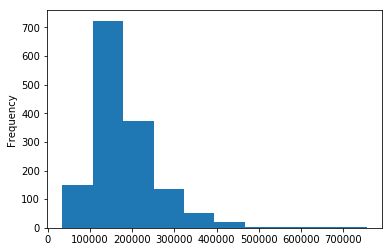

In [14]:
# Plot the target "SalePrice"
train_df['SalePrice'].plot.hist()

## the 'SalePrice' histogram shows that it's right-skewed. 
### we want to create the Log of 'SalePrice' as 'In_SalePrice', and it will shows that histogram is more nomally distributed.

In [15]:
# create a column 'In_SalePrice'

train_df['In_SalePrice'] = np.log(train_df['SalePrice'])

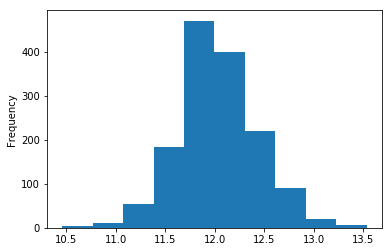

In [16]:
# plot the 'In_salePrice'

train_df['In_SalePrice'].plot.hist()

In [17]:
# check the dataset with new column 'In_SalePrice'

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,In_SalePrice
0,1,60,RL,65.0,8450,Pave,Not_Available,Reg,Lvl,AllPub,...,Not_Available,Not_Available,Not_Available,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,Not_Available,Reg,Lvl,AllPub,...,Not_Available,Not_Available,Not_Available,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,Not_Available,IR1,Lvl,AllPub,...,Not_Available,Not_Available,Not_Available,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,Not_Available,IR1,Lvl,AllPub,...,Not_Available,Not_Available,Not_Available,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,Not_Available,IR1,Lvl,AllPub,...,Not_Available,Not_Available,Not_Available,0,12,2008,WD,Normal,250000,12.429216


In [18]:
# Continues Variable 
cont_names = train_df.select_dtypes(include=[np.number]).columns.tolist()
cont_names

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'In_SalePrice']

In [19]:
# Categorical Variable
cat_names = train_df.select_dtypes(include=['object']).columns.tolist()
cat_names

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [20]:
# print out length of cont_name & cat_names

print('the length of cont_names: ' + str(len(cont_names)))
print('the length of cat_names: '+ str(len(cat_names)))

the length of cont_names: 39
the length of cat_names: 43


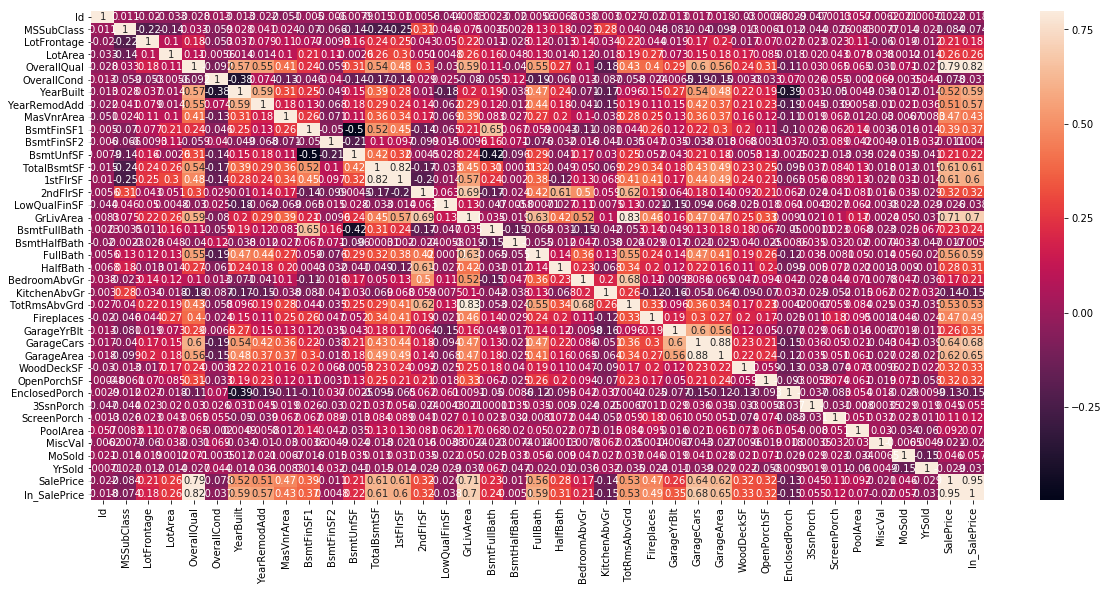

In [21]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);


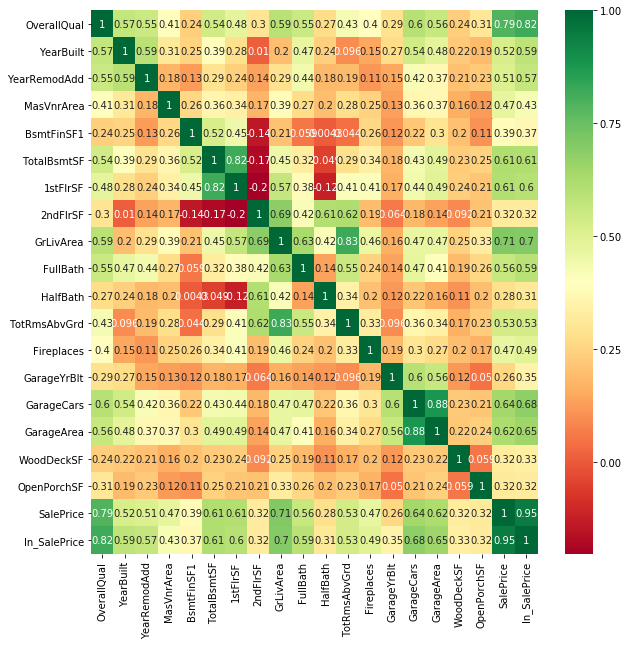

In [22]:
# most correlated features
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["In_SalePrice"])>0.3]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
print("Find most important features relative to target")
corr = train_df.corr()
corr.sort_values(["In_SalePrice"], ascending = False, inplace = True)
print(corr.In_SalePrice)

Find most important features relative to target
In_SalePrice     1.000000
SalePrice        0.948374
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.426775
BsmtFinSF1       0.372023
GarageYrBlt      0.349014
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
LotFrontage      0.179303
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      

In [24]:
# based on above most correlated features heatmap, we choose 10 of them
most_imp_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt',
                    'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea']

In [25]:
train_df.shape

(1460, 82)

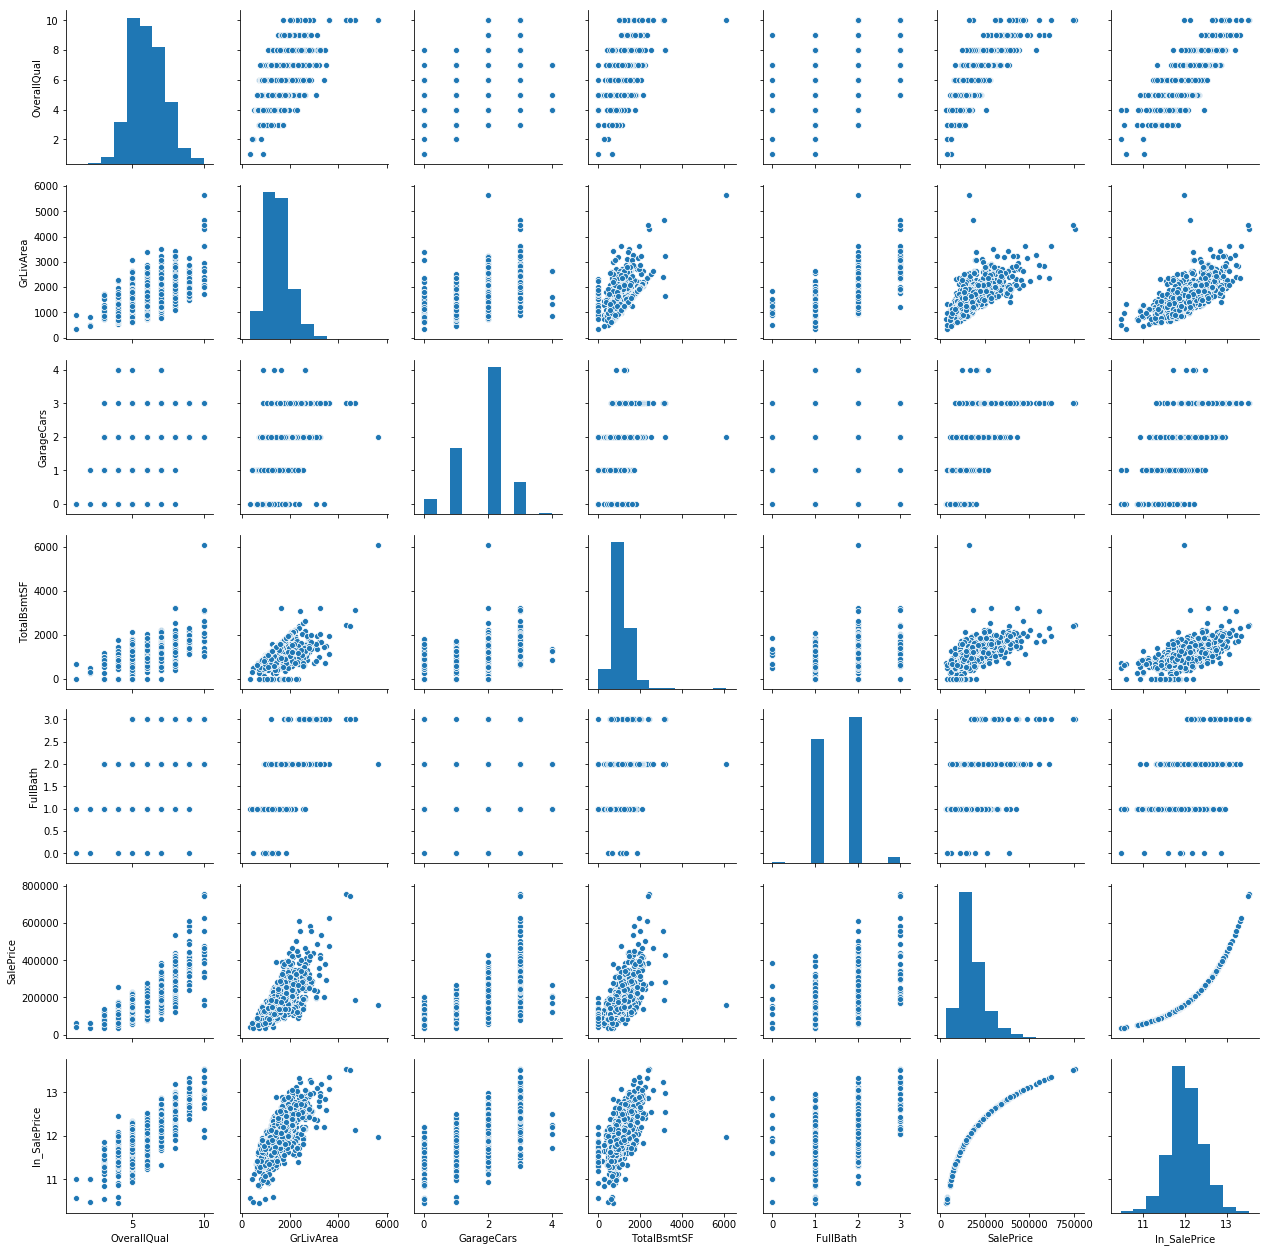

In [26]:
# plot most_imp_features with target
sns.pairplot(train_df[most_imp_features[:5] + cont_names[37:]])
plt.show()

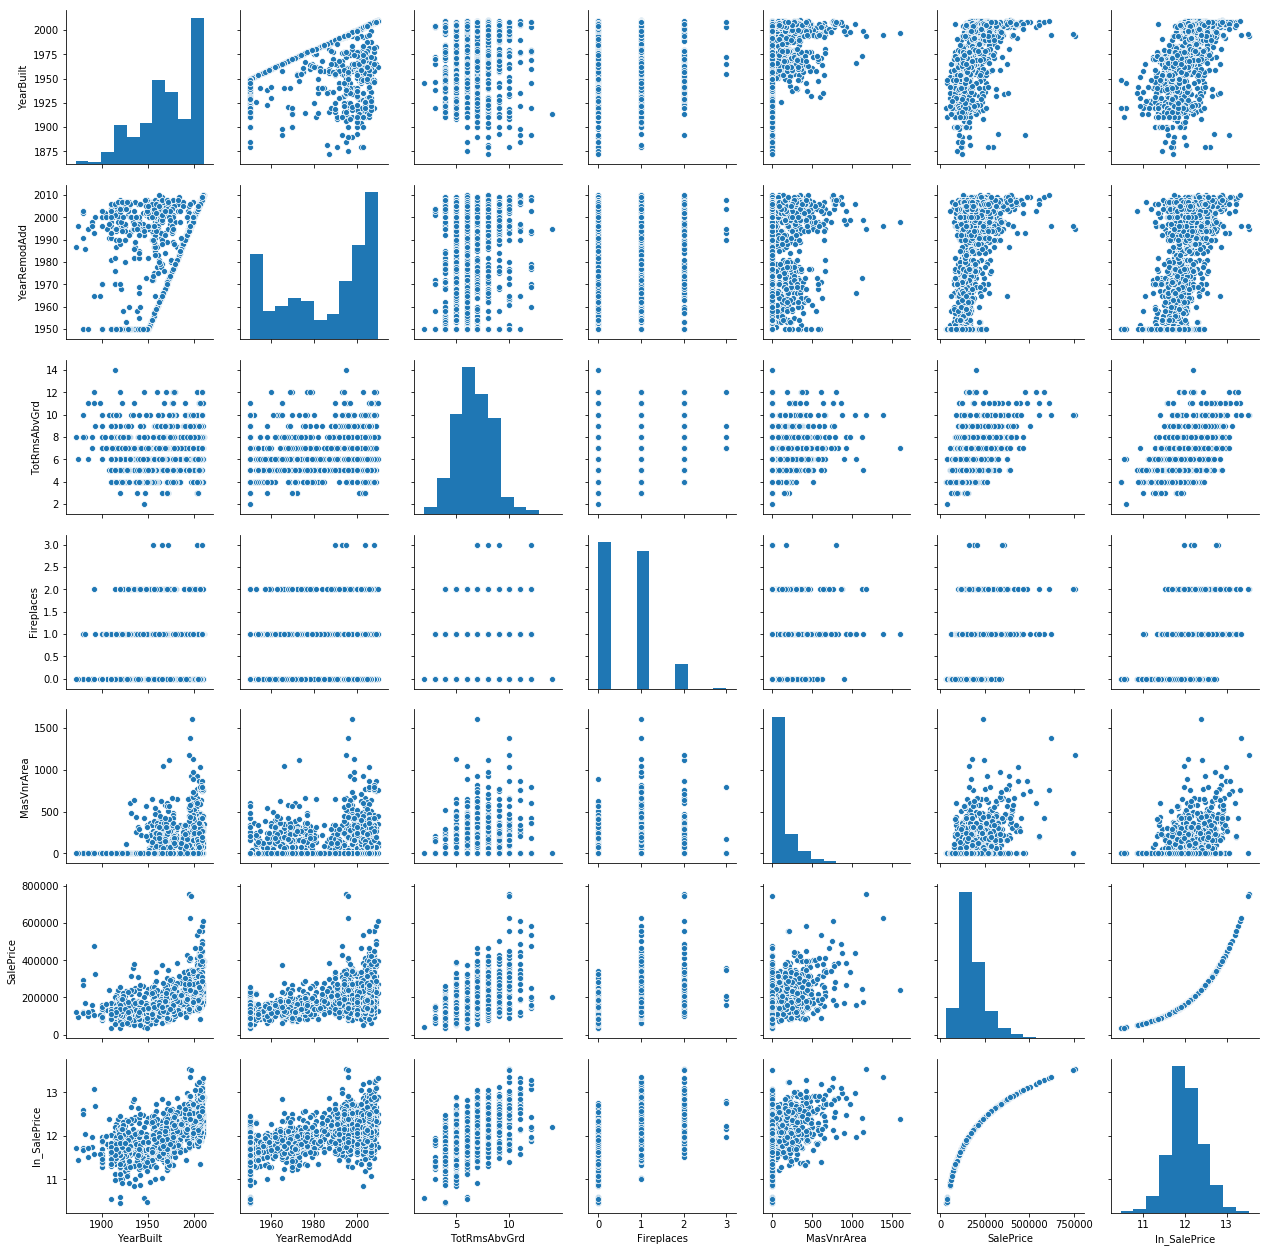

In [27]:
sns.pairplot(train_df[most_imp_features[5:] + cont_names[37:]])
plt.show()

### examing above graphs, we try to remove the outliers

In [28]:
train_df = train_df[-((train_df['OverallQual'] >=3) & (train_df['In_SalePrice'] <= 10.5))]
train_df.shape

(1459, 82)

In [29]:
train_df = train_df[-((train_df['GrLivArea'] > 4000) & (train_df['In_SalePrice'] < 13))]
train_df.shape

(1457, 82)

In [30]:
train_df = train_df[-((train_df['TotRmsAbvGrd'] >=3) & (train_df['In_SalePrice'] <= 10.5))]
train_df.shape

(1456, 82)

In [31]:
train_df = train_df[train_df['TotRmsAbvGrd'] < 14]
train_df.shape

(1455, 82)

## plot the categorical columns 

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


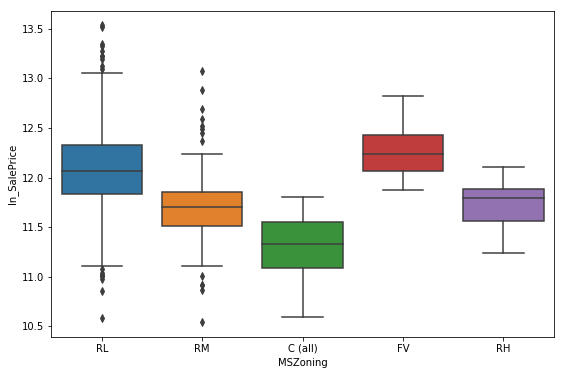

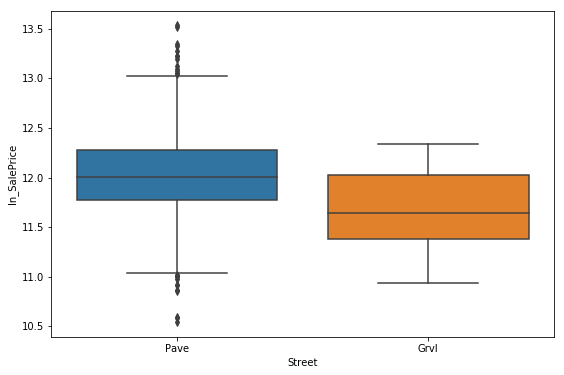

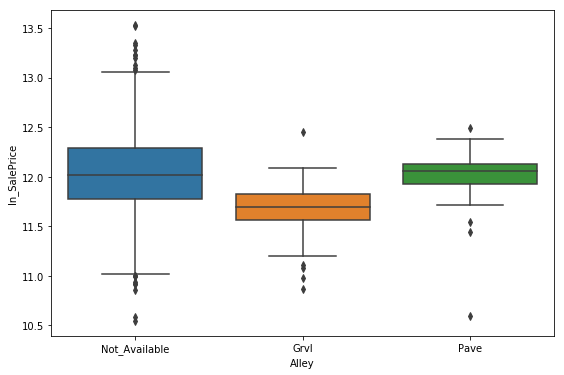

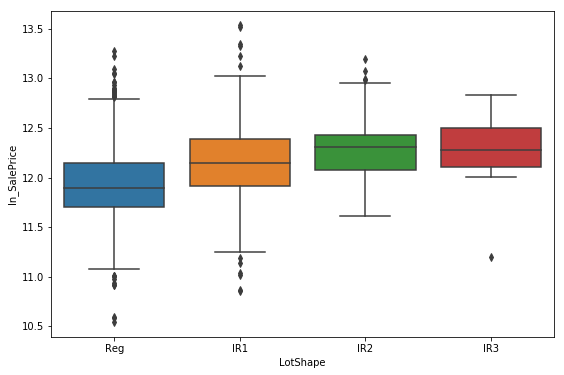

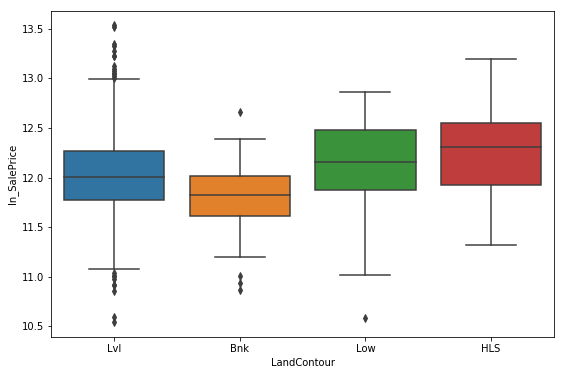

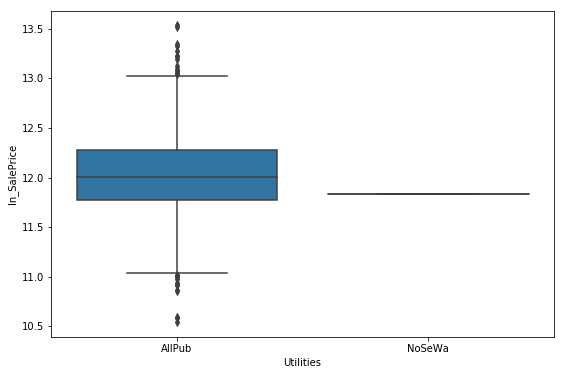

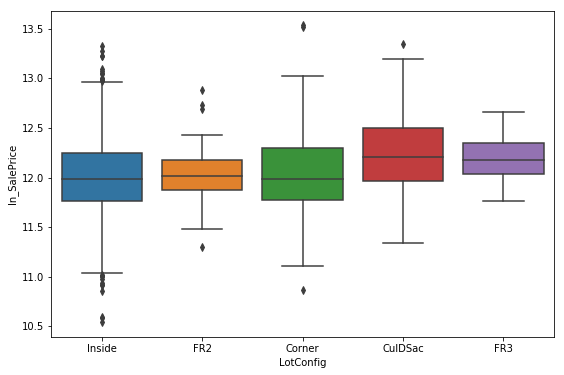

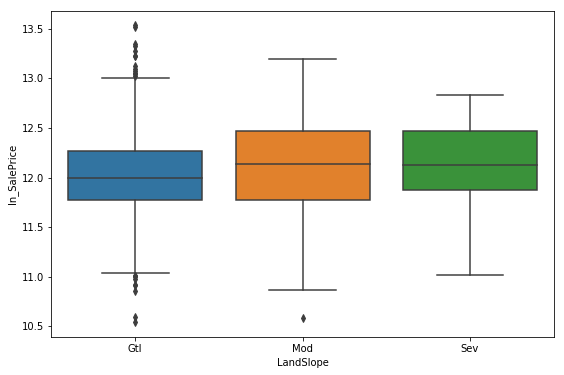

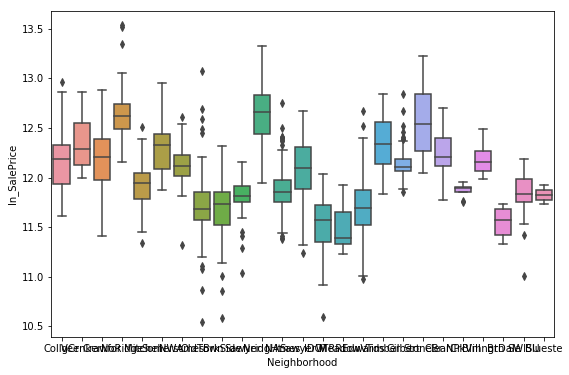

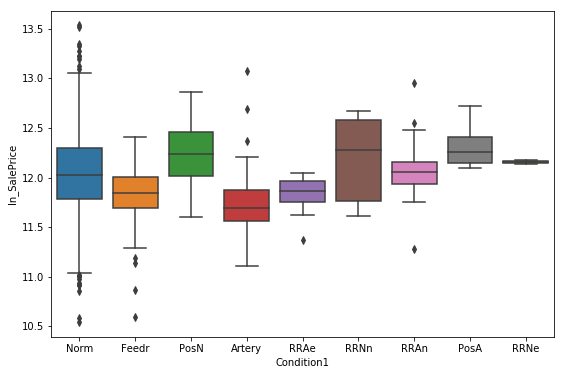

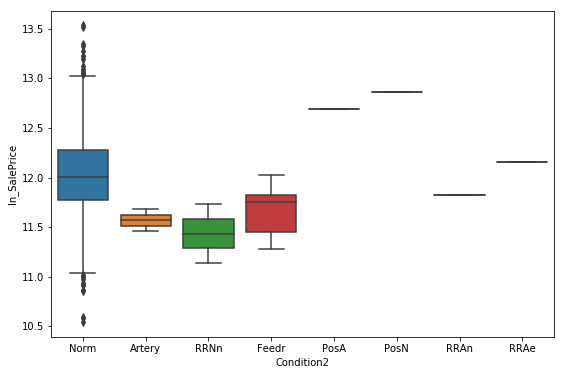

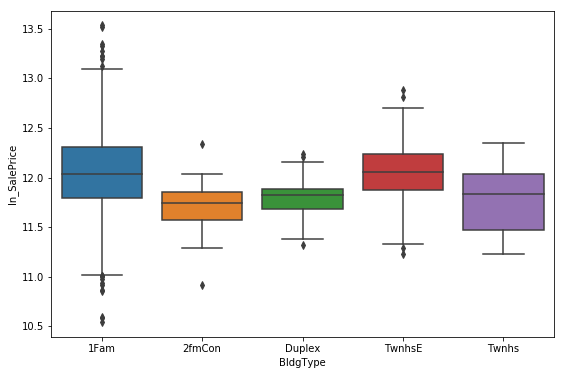

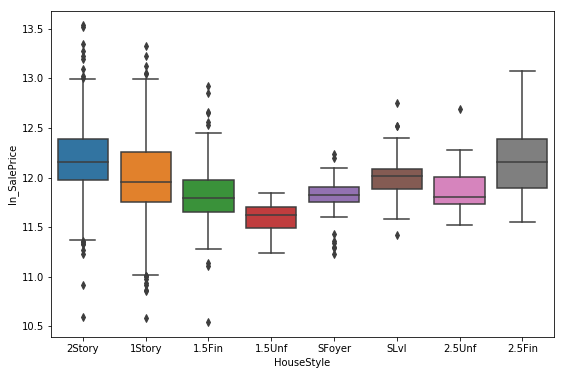

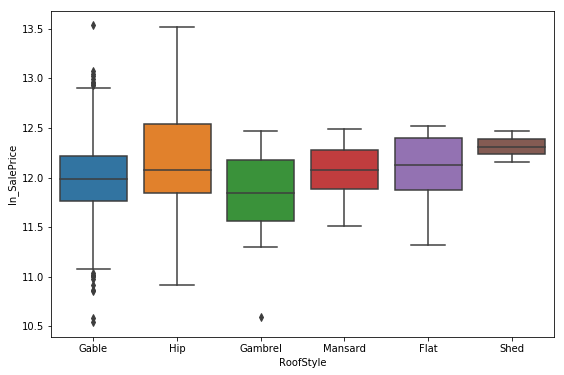

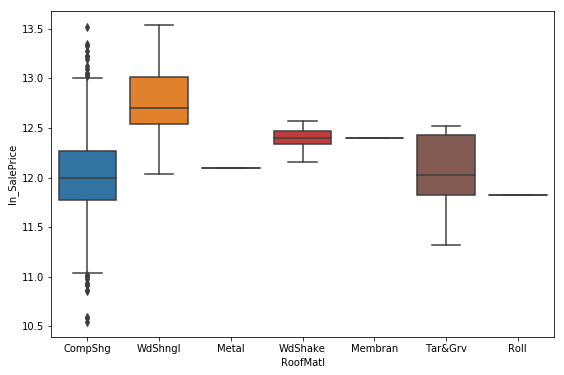

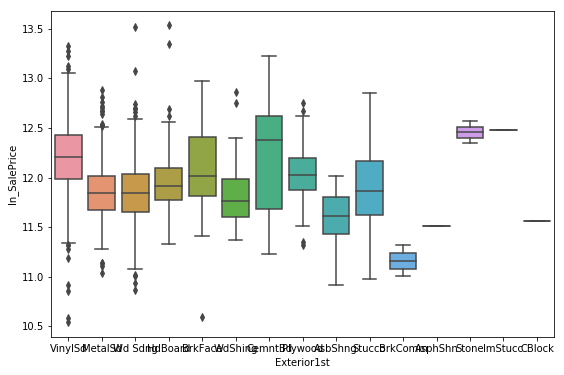

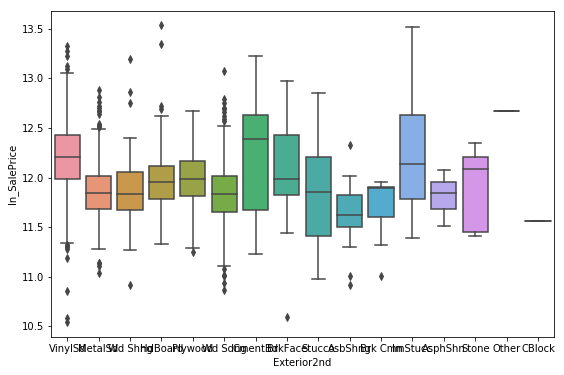

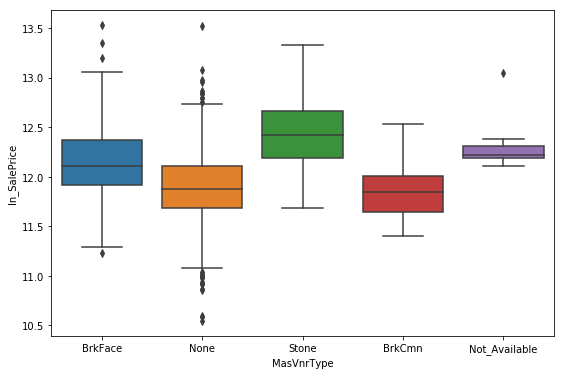

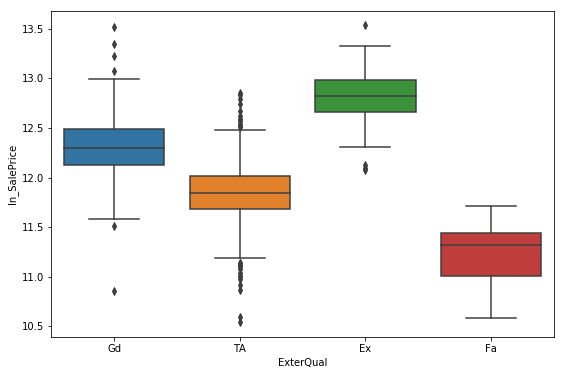

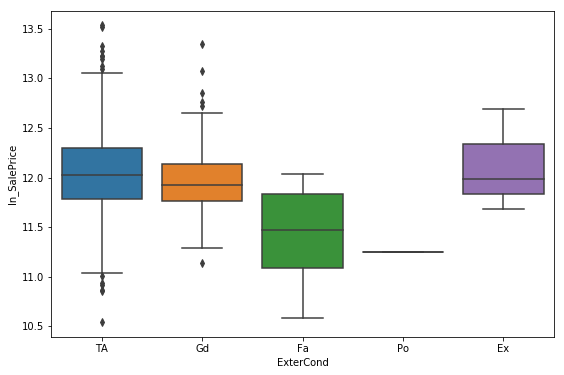

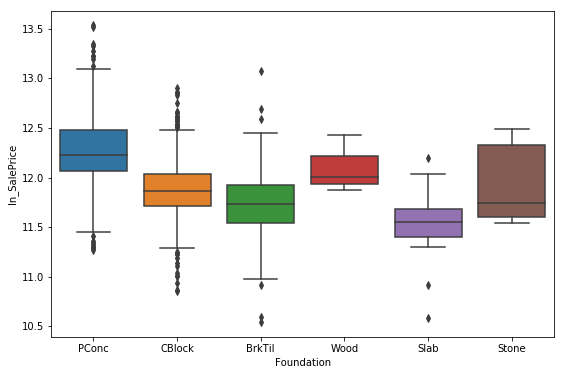

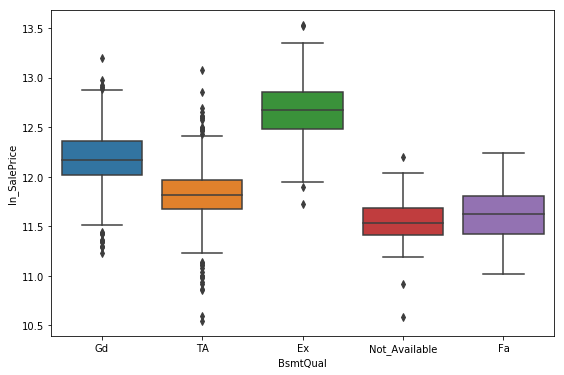

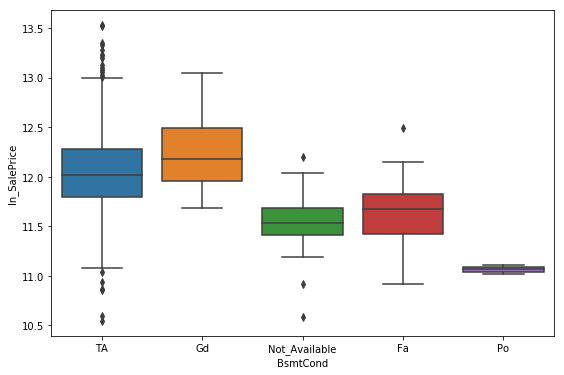

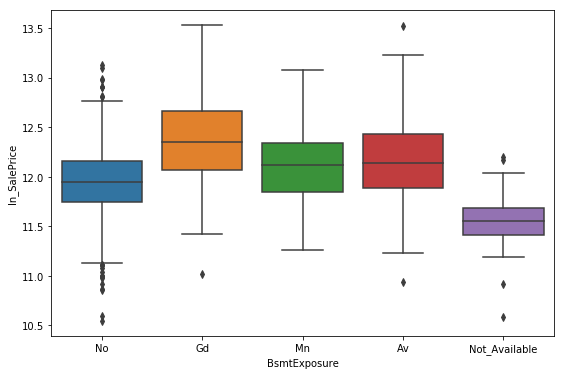

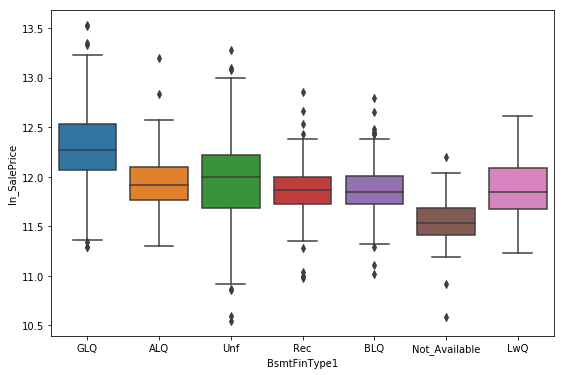

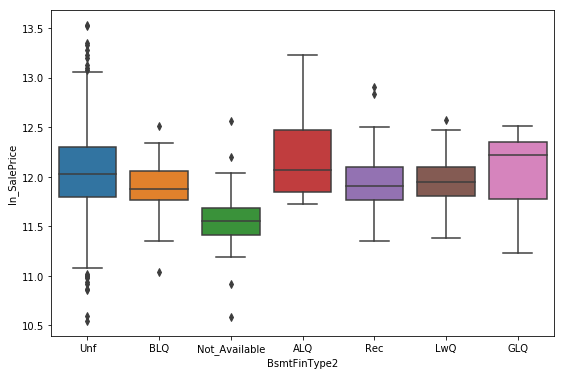

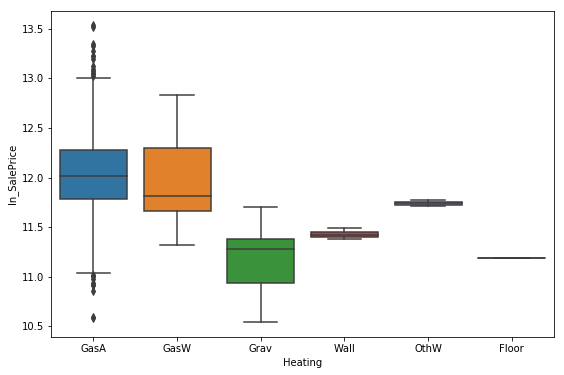

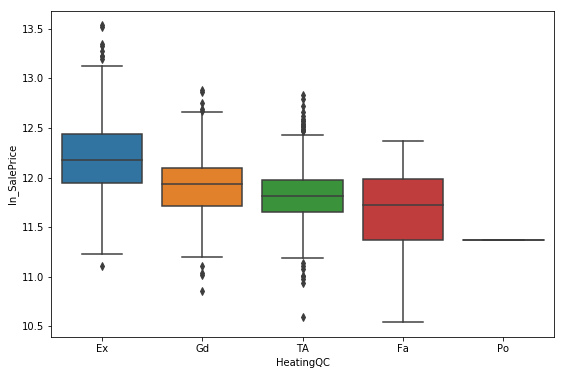

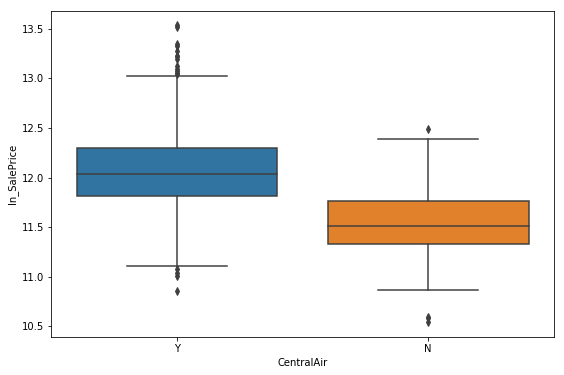

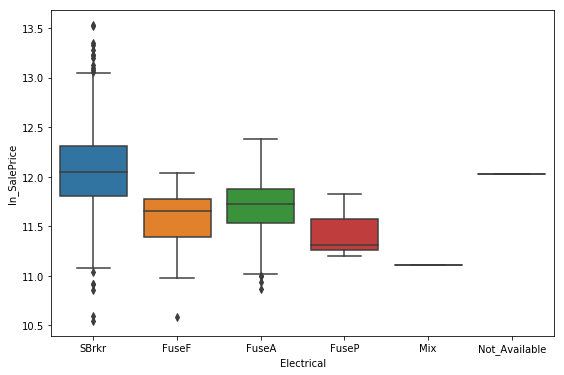

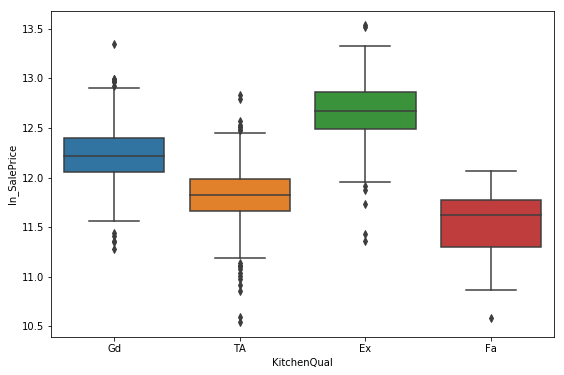

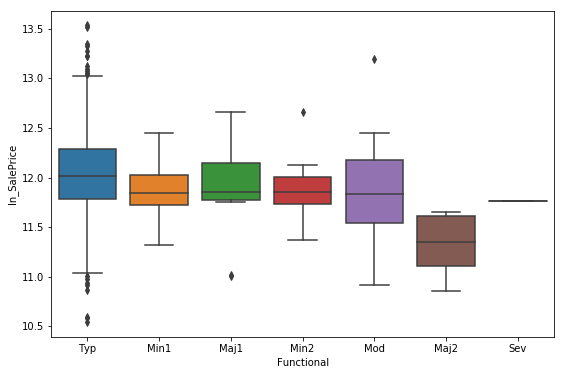

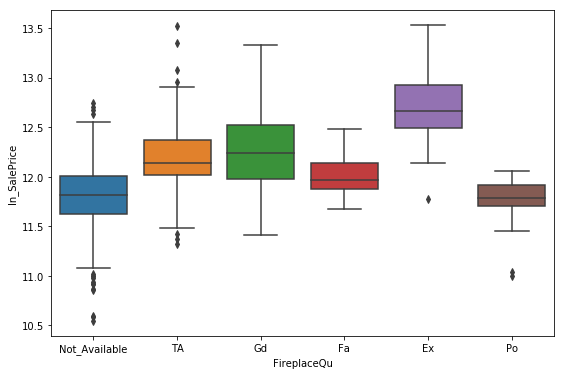

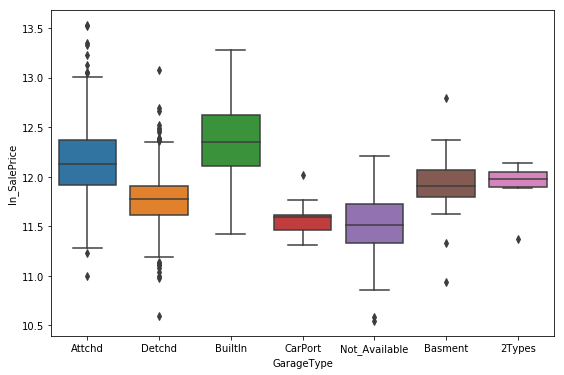

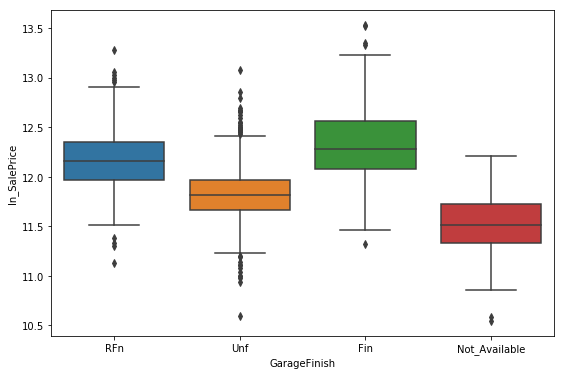

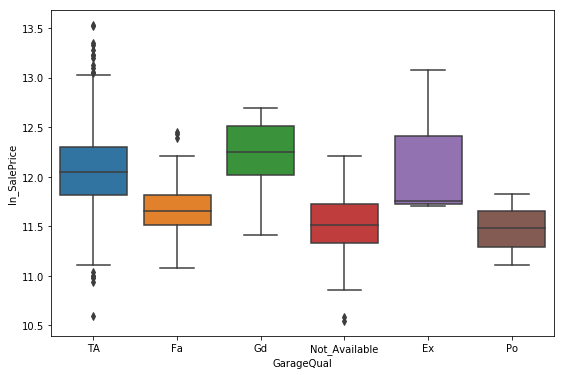

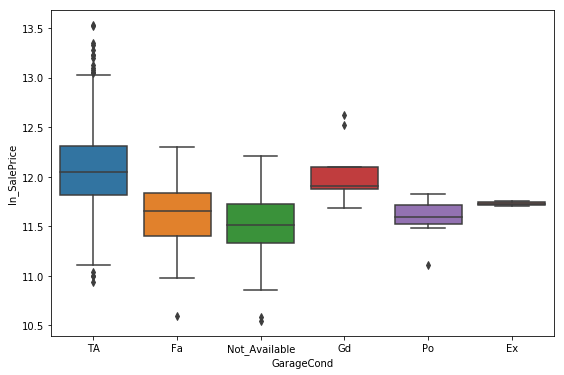

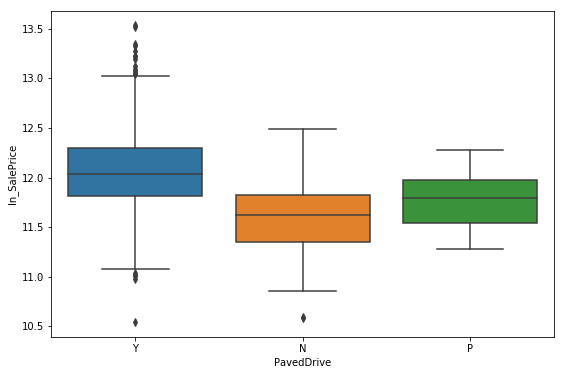

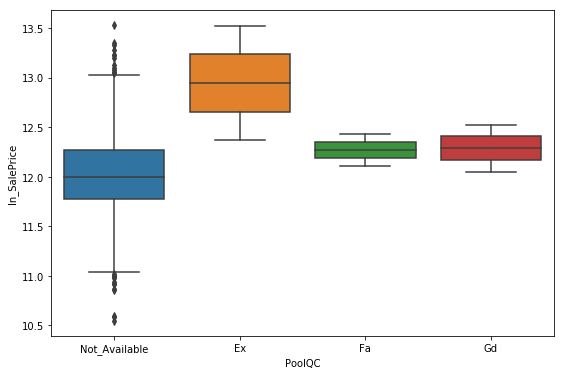

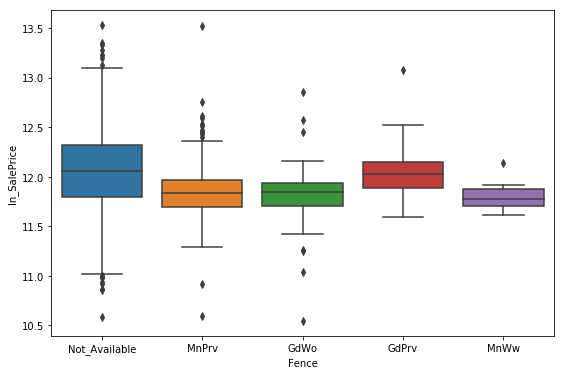

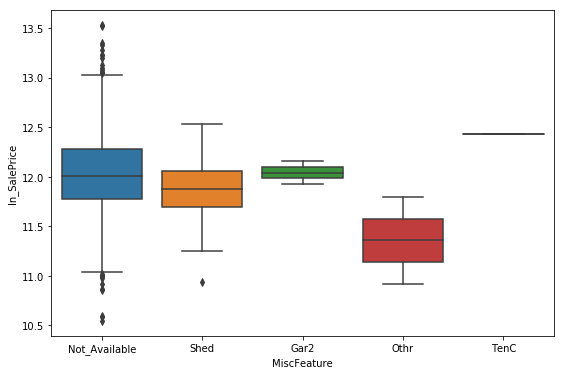

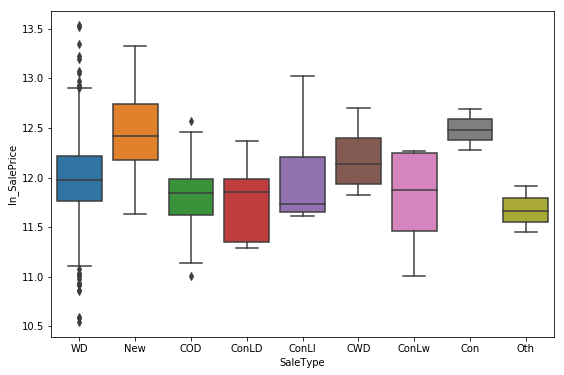

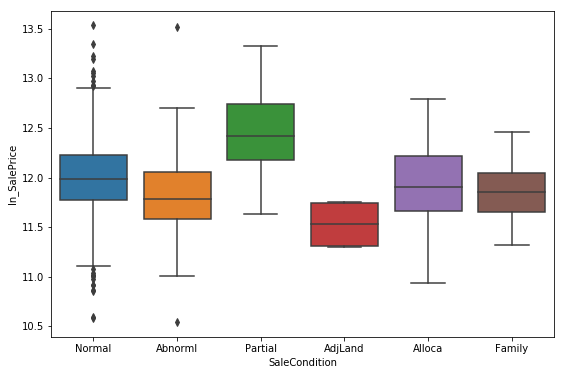

In [32]:
# use boxplot to plot the categorical columns with target 
for i, col in enumerate(cat_names):
    plt.figure(i, figsize = (9, 6))
    sns.boxplot(x=col, y=train_df['In_SalePrice'], data=train_df[cat_names])



# Convert the "MSSubClass" from type 'Numeric' to 'object'

train_df['MSSubClass'].astype('object')
cont_names.remove('MSSubClass')
cat_names = ['MSSubClass'] + cat_names


In [33]:
# Remove "Id" from cont_names
cont_names.remove('Id')

# One-Hot Encoder to encode the Categorical Variables

In [34]:
# use One-Hot Encoder to encode the Categorical Variables
for variable in cat_names:
    dummies = pd.get_dummies(train_df[variable], prefix = variable)
    train_df = pd.concat([train_df, dummies], axis=1)
    train_df.drop([variable], axis=1, inplace=True)

In [35]:
# shape of train_df after One-Hot Encoding
train_df.shape

(1455, 306)

# Split into Train & Test Set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['Id', 'SalePrice', 'In_SalePrice'], axis=1), train_df['In_SalePrice'], test_size=0.30, random_state=42)

In [37]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
464,20,60.0,8430,5,5,1978,1978,136.0,616,0,...,0,0,0,1,0,0,0,0,1,0
471,60,92.0,11952,7,6,1977,1977,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1333,50,60.0,7200,5,6,1938,1995,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
435,60,43.0,10667,7,6,1996,1996,0.0,385,344,...,1,0,0,0,0,0,0,0,1,0
1210,60,70.0,11218,6,5,1992,1992,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0


# creat the model, train the model, and use the model to make the predictions

I use the Random Forest for this model, and I use the different numbers for n_estimators, max_depth, and max_features. At the end, I use n-estimatore=300, max_depth=20, and max_features=60 for this model. 

In [38]:
# use Random Forest to treat a model
model = RandomForestRegressor(n_estimators=300, criterion='mse', max_depth=20, max_features=60, n_jobs=-1, random_state=42)

In [39]:
# use the exited model to train the training set
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=60, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [40]:
# predit the test set 
y_pred = model.predict(X_test)

In [41]:
# use the Root Mean Squared Error metric to measure the predicted prices with actual prices
from sklearn.metrics import mean_squared_error

meanSquaredError=mean_squared_error(np.exp(y_test), np.exp(y_pred))
print("MSE:", meanSquaredError)
rootMeanSquaredError = np.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

MSE: 439337487.8306432
RMSE: 20960.379000167035
